<a href="https://colab.research.google.com/github/yuliiabosher/Adam_Smith_project/blob/main/Visualisations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install nltk
!pip install nxviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 2.8 MB/s eta 0:00:00


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import collections
from gensim.corpora.dictionary import Dictionary
from gensim.models.tfidfmodel import TfidfModel
import itertools
from textblob import TextBlob
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS
import networkx as nx
import nxviz as nv
from nxviz import annotate

nltk.download("punkt")
nltk.download("averaged_perceptron_tagger")
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('stopwords')
nltk.download('wordnet')

/usr/local/lib/python3.10/dist-packages/nxviz/__init__.py:18: UserWarning: 
nxviz has a new API! Version 0.7.4 onwards, the old class-based API is being
deprecated in favour of a new API focused on advancing a grammar of network
graphics. If your plotting code depends on the old API, please consider
pinning nxviz at version 0.7.4, as the new API will break your old code.

To check out the new API, please head over to the docs at
https://ericmjl.github.io/nxviz/ to learn more. We hope you enjoy using it!

(This deprecation message will go away in version 1.0.)

  warnings.warn(
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk

True

In [3]:
def month_to_number(month):
  months = {"january": "1", "february": "2", "march": "3", "april": "4", "may": "5", "june": "6", "july": "7", \
            "august": "8", "september": "9", "october": "10", "november": "11", "december": "12"}
  month = month.lower()
  numerical = months[month]
  return numerical

def to_date(string):
  elements = string.split(',')
  year = elements[-1].strip()
  month, day = elements[-2].split()
  month = month_to_number(month)
  date = f'{year}-{month}-{day}'
  return date

In [4]:
def clean_df(df):
  df = pd.read_excel(df)
  df = df.fillna('n/a')
  df = df.drop(df[df['Mention of Adam smith'].str.contains('NA')].index)
  df = df.drop(df[df['Mention of Adam smith'].str.contains('n/a')].index)
  df.columns = ['Date', 'Extract', 'Notes', 'Notes2', 'About Adam Smith', 'Rep']
  dates = []
  for index, row in df.iterrows():
    dates.append(to_date(row['Date']))
  df['Date'] = dates
  df['Date'] = pd.to_datetime(df['Date'])
  df = df.set_index('Date').sort_index()
  return df
df = clean_df('https://github.com/yuliiabosher/Adam_Smith_project/raw/main/adam_smith.xlsx')
display(df.head())

,Extract,Notes,Notes2,About Adam Smith,Rep
Date,,,,,
2008-06-10,Democrats will claim this bill will bring gas ...,n/a,n/a,n/a,Mitch McConnell \nRepublican Party
2008-06-12,The sad truth is that the bulk of the EADS tan...,n/a,n/a,n/a,Donald Anthony Manzullo\nRepublican Party
2008-07-10,"The father of modern capitalism, Adam Smith, o...",n/a,n/a,n/a,Joseph Isadore Lieberman\nDemocratic Party
2008-07-15,This gold is not coming back on the market. Su...,n/a,n/a,n/a,Steve King\nRepublican Party
2008-07-23,There are those who will object to the bill be...,n/a,n/a,-‘‘The Wealth of Nations”\n- Those exertions o...,Joseph Isadore Lieberman\nDemocratic Party


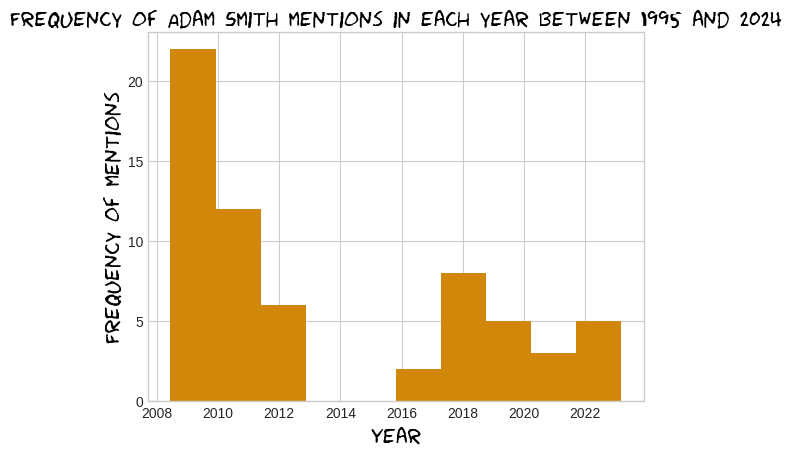

In [5]:
def create_histogram(df):
  #styles 'fast','fivethirtyeight'',',''seaborn-v0_8-whitegrid'
  plt.style.use('seaborn-v0_8-whitegrid')
  plt.hist(df.index, color='#D1870A')
  font = {'family':'fantasy','color':'black','size':15}
  plt.xlabel('Year', fontdict = font)
  plt.ylabel('Frequency of mentions', fontdict = font)
  plt.title('Frequency of Adam Smith mentions in each year between 1995 and 2024', fontdict = font)
  plt.show()

create_histogram(df)

In [6]:
def tokenize_df(df):
  tokens = [nltk.word_tokenize(row['Extract']) for index, row in df.iterrows()]
  return tokens

token_list = tokenize_df(df)
print(token_list[0][:10])

['Democrats', 'will', 'claim', 'this', 'bill', 'will', 'bring', 'gas', 'prices', 'down']


In [7]:
def preprocess_tokens(list_of_lists):
  lower_tokens = [[t.lower() for t in list_of_tokens] for list_of_tokens in list_of_lists for t in list_of_tokens]
  alpha_only = [[t for t in token_list if t.isalpha()] for token_list in lower_tokens]
  no_stops = [[t for t in alpha_list if t not in nltk.corpus.stopwords.words('english')] for alpha_list in alpha_only]
  wordnet_lemmatizer = nltk.stem.WordNetLemmatizer()
  lemmatized = [[wordnet_lemmatizer.lemmatize(t) for t in no_stops_list] for no_stops_list in no_stops]
  return lemmatized

preprocessed = preprocess_tokens(token_list)
print(preprocessed[0][:10])

['democrat', 'claim', 'bill', 'bring', 'gas', 'price', 'counting', 'american', 'forget', 'basic']


In [8]:
def create_corpus(preprocessed_data):
  dictionary = Dictionary(preprocessed)
  corpus = [dictionary.doc2bow(article) for article in preprocessed]
  return dictionary, corpus

dictionary, corpus = create_corpus(preprocessed)
print(corpus[0][:10])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1)]


In [9]:
import itertools
from collections import defaultdict
x = [[i[0] for i in j] for j in corpus]

pairs=[list(itertools.combinations(nested_list,2)) for nested_list in x]
catalogue_of_occurences = defaultdict(int)
repeating_pairs = {}
for list_of_pairs in pairs:
  for pair in list_of_pairs:
    catalogue_of_occurences[pair]+=1
y = list(catalogue_of_occurences.keys())
y[0]

(0, 1)

[990, 970, 505, 480, 418, 404, 402, 307, 306, 295, 280, 279, 263, 257, 252, 251, 243, 242, 239, 235, 232, 230, 229, 229, 227, 222, 209, 206, 205, 205, 202, 200, 196, 196, 195, 191, 191, 191, 182, 181, 180, 180, 179, 178, 178, 176, 174, 173, 171, 171, 171, 169, 168, 162, 160, 160, 160, 160, 159, 159, 159, 158, 158, 157, 154, 153, 153, 151, 150, 150, 145, 143, 142, 140, 139, 138, 137, 136, 135, 134, 134, 132, 132, 131, 131, 130, 130, 130, 130, 128, 128, 125, 124, 123, 123, 122, 119, 119, 118, 117, 117, 116, 115, 115, 114, 113, 113, 112, 112, 109, 109, 109, 108, 106, 106, 106, 106, 105, 104, 104, 103, 103, 102, 101, 101, 101, 99, 98, 98, 97, 96, 96, 95, 95, 94, 94, 94, 94, 93, 92, 92, 92, 92, 91, 91, 90, 90, 89, 89, 89, 88, 88, 88, 88, 88, 88, 87, 87, 87, 87, 87, 86, 85, 85, 85, 85, 85, 84, 84, 84, 83, 83, 83, 83, 83, 83, 82, 81, 81, 81, 81, 81, 80, 79, 78, 78, 77, 77, 77, 77, 76, 76, 76, 75, 75, 74, 73, 73, 72, 71, 71, 71, 70, 70, 70, 69, 69, 69, 69, 69, 68, 68, 68, 68, 68, 67, 67, 67, 6

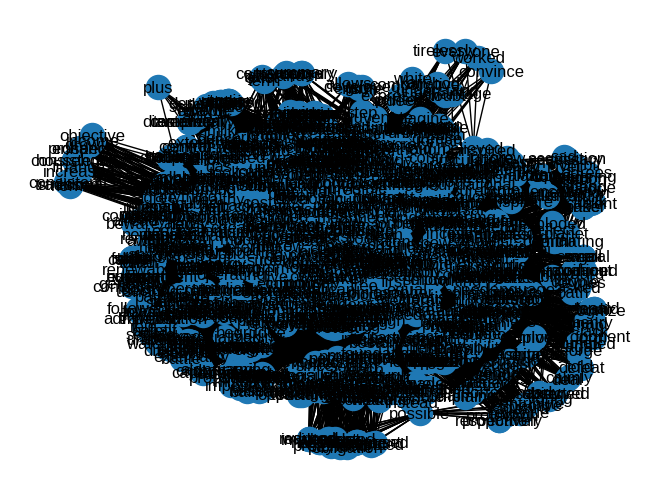

In [10]:
G = nx.Graph()
nodes = [i[0] for j in corpus for i in j]
G.add_nodes_from(nodes)
[G.add_edge(i[0],i[1]) for i in y]
for word_id in nodes:
  G.nodes[word_id]['label'] = dictionary.get(word_id)
labels = {}
for node, data in G.nodes(data=True):
  labels[node] = data.get('label')
nx.draw(G, with_labels=True, labels = labels)
G.nodes(data=True)
degrees = [len(list(G.neighbors(n))) for n in G.nodes()]
print(sorted(degrees, reverse=True))

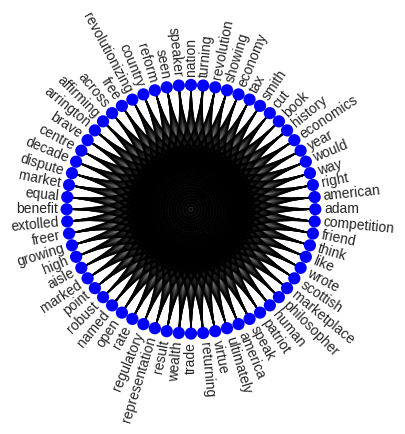

In [48]:
def visualise_clique(n):
  largest_clique = sorted(nx.find_cliques(G), key=lambda x:len(x))[n]
  G_lc = G.subgraph(largest_clique)
  c = nv.circos(G_lc)
  labels = {}
  for node, data in G_lc.nodes(data=True):
    labels[node] = data.get('label')
  G_lc = nx.relabel_nodes(G_lc, labels)
  annotate.circos_labels(G_lc,  layout="rotate")
  plt.tight_layout(rect=(0.05, 0.05, 0.95, 0.95))
  plt.show()
visualise_clique(-1)

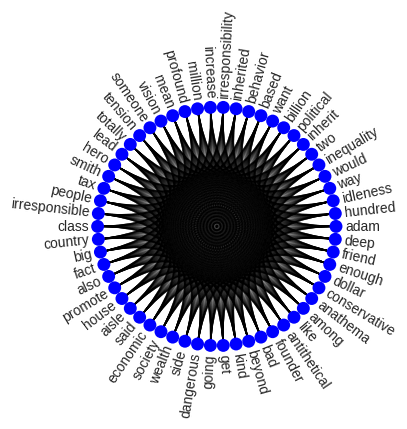

In [49]:
visualise_clique(-2)

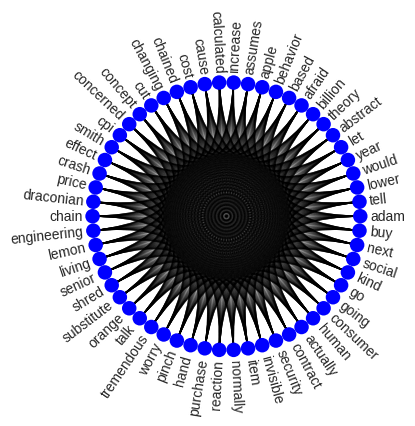

In [50]:
visualise_clique(-3)

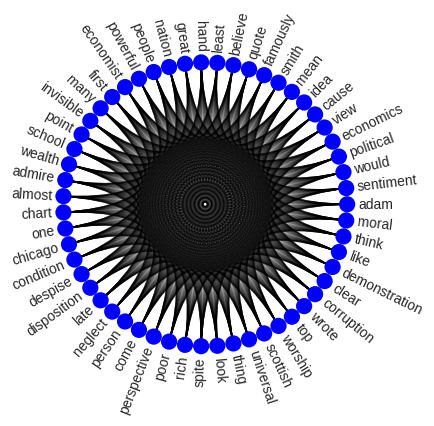

In [51]:
visualise_clique(-4)

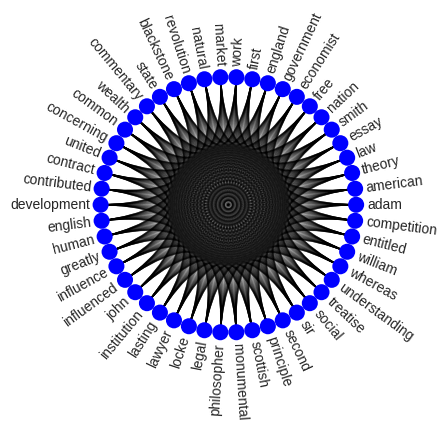

In [52]:
visualise_clique(-5)

In [53]:
def word_count_desc(corpus):
  total_word_count = collections.defaultdict(int)
  for word_id, word_count in itertools.chain.from_iterable(corpus):
      total_word_count[word_id] += word_count
  sorted_word_count = sorted(total_word_count.items(), key=lambda w: w[1], reverse=True)
  return sorted_word_count

sorted_word_count = word_count_desc(corpus)
print(sorted_word_count[:10])

[(25, 7145), (0, 6975), (89, 2868), (64, 2687), (49, 2554), (72, 2448), (260, 1778), (177, 1758), (261, 1696), (66, 1669)]


In [54]:
for word_id, word_count in sorted_word_count[:20]:
    print(dictionary.get(word_id), word_count)

smith 7145
adam 6975
wealth 2868
free 2687
nation 2554
market 2448
would 1778
people 1758
year 1696
government 1669
country 1414
wrote 1307
cost 1272
price 1243
labor 1229
going 1152
hand 1118
capitalism 1117
get 1097
said 1091


In [55]:
def calculate_weight_of_words(corpus):
  try:
    tfidf = TfidfModel(corpus)
    all_tfidf_weights = []
    i=1
    while tfidf[corpus[i]]:
      tfidf_weights = tfidf[corpus[i]]
      sorted_tfidf_weights = sorted(tfidf_weights, key=lambda w: w[1], reverse=True)
      all_tfidf_weights.append(sorted_tfidf_weights)
      i+=1
    return all_tfidf_weights
  except IndexError:
    return all_tfidf_weights

all_tfidf_weights = calculate_weight_of_words(corpus)
for term_id, weight in all_tfidf_weights[1][:20]:
  print(dictionary.get(term_id), weight)

price 0.3212452135855892
true 0.2879261495074759
tax 0.2354929036321366
basic 0.2270359246974267
claim 0.2270359246974267
counting 0.2270359246974267
factory 0.2270359246974267
forget 0.2270359246974267
gas 0.2270359246974267
higher 0.2270359246974267
company 0.18214318149739647
bring 0.17772475487471412
raising 0.17772475487471412
pin 0.17688419651600132
something 0.17470664875217823
lead 0.16412402999871922
democrat 0.1601428744175358
sell 0.15994151160755318
bill 0.1542354571746034
product 0.15075059380003444


In [56]:
def add_extract_length(df):
  df['Extract length'] = df['Extract'].str.len()
  return df
df = add_extract_length(df)
display(df.head())

,Extract,Notes,Notes2,About Adam Smith,Rep,Extract length
Date,,,,,,
2008-06-10,Democrats will claim this bill will bring gas ...,n/a,n/a,n/a,Mitch McConnell \nRepublican Party,356
2008-06-12,The sad truth is that the bulk of the EADS tan...,n/a,n/a,n/a,Donald Anthony Manzullo\nRepublican Party,336
2008-07-10,"The father of modern capitalism, Adam Smith, o...",n/a,n/a,n/a,Joseph Isadore Lieberman\nDemocratic Party,497
2008-07-15,This gold is not coming back on the market. Su...,n/a,n/a,n/a,Steve King\nRepublican Party,426
2008-07-23,There are those who will object to the bill be...,n/a,n/a,-‘‘The Wealth of Nations”\n- Those exertions o...,Joseph Isadore Lieberman\nDemocratic Party,475


In [57]:
def check_sentiment(df):
  polarity = []
  subjectivity = []
  for index, row in df.iterrows():
    sentiment = TextBlob(row['Extract'])
    polarity.append(sentiment.polarity)
    subjectivity.append(sentiment.subjectivity)
  df['Polarity'] = polarity
  df['Subjectivity'] = subjectivity
  return df

df_sentiments = check_sentiment(df)
display(df_sentiments.head())

,Extract,Notes,Notes2,About Adam Smith,Rep,Extract length,Polarity,Subjectivity
Date,,,,,,,,
2008-06-10,Democrats will claim this bill will bring gas ...,n/a,n/a,n/a,Mitch McConnell \nRepublican Party,356,0.140278,0.485913
2008-06-12,The sad truth is that the bulk of the EADS tan...,n/a,n/a,n/a,Donald Anthony Manzullo\nRepublican Party,336,-0.072917,0.775000
2008-07-10,"The father of modern capitalism, Adam Smith, o...",n/a,n/a,n/a,Joseph Isadore Lieberman\nDemocratic Party,497,0.250000,0.404545
2008-07-15,This gold is not coming back on the market. Su...,n/a,n/a,n/a,Steve King\nRepublican Party,426,0.005556,0.136111
2008-07-23,There are those who will object to the bill be...,n/a,n/a,-‘‘The Wealth of Nations”\n- Those exertions o...,Joseph Isadore Lieberman\nDemocratic Party,475,0.266667,0.488095


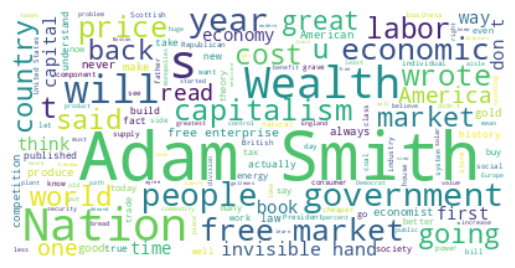

In [58]:
def word_cloud(df):
  text = " "
  for index, row in df.iterrows():
    text += " "
    text += row['Extract']
  word_cloud = WordCloud(background_color='white').generate(text)
  plt.imshow(word_cloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()
word_cloud(df)

In [59]:
def bow_with_ngrams(df):
  my_stop_words = list(ENGLISH_STOP_WORDS.union(['adam', 'smith', 'speaker', 'don', 'seen', 'smith' 'wrote', 'actually', 'mr speaker', 'sure', 'said']))
  vect = CountVectorizer(ngram_range=(1, 2), max_features=200, stop_words=my_stop_words)
  vect.fit(df.Extract)
  X_extract = vect.transform(df.Extract)
  X_df=pd.DataFrame(X_extract.toarray(), columns=vect.get_feature_names_out())
  return X_df
display(bow_with_ngrams(df).columns)
bow_bigrams = bow_with_ngrams(df).head()
print(bow_bigrams)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['mr'] not in stop_words.
  warnings.warn(


Index(['1776', 'aisle', 'america', 'american', 'americans', 'based', 'believe',
       'benefits', 'better', 'big',
       ...
       'wool', 'work', 'works', 'world', 'wrote', 'wrote wealth', 'year',
       'year 1776', 'years', 'yes'],
      dtype='object', length=200)

   1776  aisle  america  american  americans  based  believe  benefits  \
0     0      0        0         0          1      0        0         0   
1     0      0        0         0          0      0        0         0   
2     0      0        0         0          0      0        0         0   
3     0      0        1         0          2      0        0         0   
4     0      0        0         0          0      0        0         0   

   better  big  ...  wool  work  works  world  wrote  wrote wealth  year  \
0       0    0  ...     0     0      0      0      0             0     0   
1       0    0  ...     0     0      0      0      0             0     0   
2       0    0  ...     0     0      0      0      0             0     0   
3       0    0  ...     0     0      0      0      1             0     0   
4       0    0  ...     0     0      0      0      1             0     0   

   year 1776  years  yes  
0          0      0    0  
1          0      0    0  
2          0     

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['mr'] not in stop_words.
  warnings.warn(
